# Sentiment Analysis Twitter

For my final project I will perform sentiment analysis on tweets from twitter!
**Sentiment analysis** is process of understanding an opinion from written or spoken language.

First we need to import all the modules below
The module we will be using to grab tweets from twitter is called tweepy.
From their website, 'Tweepy is a easy-to-use Python library for accessing the Twitter API.'


In [283]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import csv
import re 
import tweepy
import pandas as pd

**Textblob** is the module we will be using to assign sentiments to our tweets.
Taken from their website , "**TextBlob** is a Python (2 and 3) library for processing **textual data**. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, **sentiment analysis**, classification, translation, and more."

In [284]:
from textblob import TextBlob 

Block of code below houses information needeed in order for twitter api to work.
You must go to twitter.com/apps in order to create your own unique id.


In [285]:
consumer_key = "v63HOd9y033rfmhpHmyoIJCdZ"
consumer_secret = "gXWjTN3i7ehAEeFUZQ8lCMYygGMH35oqn27Ic6yMTGySkG9z9S"
access_token = "1116077337588764674-IDHTKSp8nYxaiboyJicC0fTxWQcjXD"
access_secret = "01m0Ij9zlMtzkTFSFCiJrqK8wwAETnGebLFPDlHaklPw2"


This code block passes our ID through the API 

In [287]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

Below is some functions that we will need in order to do our anlaysis.

In [288]:
def clean_tweet(tweet): 
        
       # Utility function to clean tweet text by removing links, special characters 
        #using simple regex statements. 
      
        return ' '.join(re.sub("([^0-9A-Za-z\t])|(\w+:\/\/\S+)", " ", tweet).split())

In [289]:
def get_tweet_sentiment(tweet): 
        
       # Utility function to classify sentiment of passed tweet 
       # using textblob's sentiment method 
        
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        if (analysis.sentiment.polarity == 0):  
           
            return 'neutral'
        elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
            
            return 'weakly positive'
        elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):                
            
            return 'positive'
        elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
            
            return 'stongly positive'
        elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
         
            return 'weakly negative'
        elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
           
            return 'negative'
        elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
           
            return 'strongly negative'

In [360]:
def catg_sent_view(a): 
    # function takes in list and counts occurences of sentiments, adds to dictionary then finally prints
    container = []
    positive = wpositive = spositive = negative = wnegative = snegative = neutral = 0 # set values to zero

    for item in a:
        if (item == 'neutral'): 
            neutral += 1
        elif (item == 'weakly positive'):
            wpositive += 1
        elif (item == 'positive'):
            positive += 1
        elif (item == 'strongly positive'):
            spositive += 1
        elif (item == 'weakly negative'):
            wnegative += 1
        elif (item == 'negative'):
            negative += 1
        elif (item == 'strongly negative'):
            snegative += 1

# create dictionary to organize data and present better
    sent_dict = {'positive':positive,'weakly positive':wpositive,'strongly positive':spositive,'negative':negative,'weakly negative':wnegative,'strongly negative':snegative,'neutral':neutral}
    for key,val in sent_dict.items():
        print(key,':',val)
   

Below we will need to point to what user we want to analyze

In [286]:
screen_name = 'realDonaldTrump' # variable that holds screen name of twitter user you want to do sent analysis on

In [290]:
alltweets = [] # list will hold all of our tweets harvested

Below we are grabbing the tweets from the user's profile. Once the tweet is grabbed we pass the tweet through our **clean_tweet** function, which removes special characters from the text. We want to simplify the text as much as possible for our analysis. After this is performede then the cleaned tweets are passed through the **get_tweet_sentiment** function, which  analyses and assigns the sentimemt based on its  **polarity**. **Polarity** in sentiment analysis refers to identifying sentiment orientation (positive, neutral, and negative) in written or spoken language. Finally once all of this is done, we create a **csv** file to house our data.


In [291]:
new_tweets = api.user_timeline(screen_name = screen_name,count=200) # will grab 200 tweets at time from users profile

alltweets.extend(new_tweets)

oldest = alltweets[-1].id - 1

while len(new_tweets) > 0:
    print('getting tweets:')
    
    
    new_tweets = api.user_timeline(screen_name = screen_name, count = 200,max_id = oldest)
    
    # save most recent tweets
    alltweets.extend(new_tweets)
    
    #update id of oldest tweet by 1 
    oldest = alltweets[-1].id - 1
    
    print ("tweets harvested so far",len(alltweets))
    
    outtweets = [[tweet.created_at, tweet.text,get_tweet_sentiment(tweet.text)]for tweet in alltweets]
     #write to csv
    with open('tweets.csv','w') as f:
        writer = csv.writer(f)
        writer.writerow(["date","text","sentiment"])
        writer.writerows(outtweets)

getting tweets:
tweets downloaded so far 400
getting tweets:
tweets downloaded so far 600
getting tweets:
tweets downloaded so far 800
getting tweets:
tweets downloaded so far 1000
getting tweets:
tweets downloaded so far 1200
getting tweets:
tweets downloaded so far 1400
getting tweets:
tweets downloaded so far 1600
getting tweets:
tweets downloaded so far 1799
getting tweets:
tweets downloaded so far 1999
getting tweets:
tweets downloaded so far 2198
getting tweets:
tweets downloaded so far 2398
getting tweets:
tweets downloaded so far 2596
getting tweets:
tweets downloaded so far 2792
getting tweets:
tweets downloaded so far 2992
getting tweets:
tweets downloaded so far 3192
getting tweets:
tweets downloaded so far 3193
getting tweets:
tweets downloaded so far 3193


We will create **panda dataframe** from our csv file in order to visualize the data. 

In [292]:
df = pd.read_csv('tweets.csv') # create dataframe
tempdf = pd.read_csv('tweets.csv') # creates copy of dataframe

In [294]:
del tempdf['text'] # remove text col from our temp data frame 

This code that will display the different sentiment values for each month. 
Code will iterate over both date and sentiment columns in dataframe and assign month to sentiment. 

In [297]:
jan = []  # create empty list for months in tweets
feb = []
march = []
april = []
for date,sent in tempdf.itertuples(index=False): # will go through both columns
    if date[6] == '4':
        april.append(sent)
    elif date[6] == '3':
        march.append(sent)
    elif date[6] == '2':
        feb.append(sent)
    elif date[6] == '1':
        jan.append(sent)
        

Sentiment Values for months January - April.

In [361]:
print('JANUARY')
print('')
catg_sent_view(jan)
print('-----------------------')
print('FEBUARY')
print('')
catg_sent_view(feb)
print('-----------------------')
print('MARCH')
print('')
catg_sent_view(march) 
print('-----------------------')
print('APRIL')
print('')
catg_sent_view(april)

JANUARY

positive : 119
weakly positive : 186
strongly positive : 0
negative : 32
weakly negative : 84
strongly negative : 5
neutral : 198
-----------------------
FEBUARY

positive : 92
weakly positive : 132
strongly positive : 0
negative : 21
weakly negative : 73
strongly negative : 6
neutral : 155
-----------------------
MARCH

positive : 46
weakly positive : 93
strongly positive : 0
negative : 20
weakly negative : 56
strongly negative : 5
neutral : 140
-----------------------
APRIL

positive : 56
weakly positive : 80
strongly positive : 0
negative : 21
weakly negative : 47
strongly negative : 4
neutral : 120


Below I created a bar and pie chart of our collected data.
**(NOTE)** You will notice that the neutral sentiment is the largest from our tweets.
This is because the algorithm can not determine what the appropriate sentiment is, so it sets the sentiment to neutral.

In [357]:
# import data visualization tool
import matplotlib.pyplot as plt

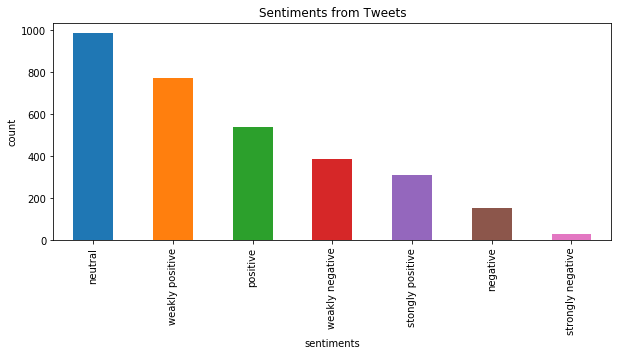

In [358]:
# creates a bar chart
fig,ax = plt.subplots()
fig.set_size_inches(10,4)
ax = pd.value_counts(df['sentiment']).plot.bar()
ax.set(xlabel='sentiments', ylabel='count', title="Sentiments from Tweets");

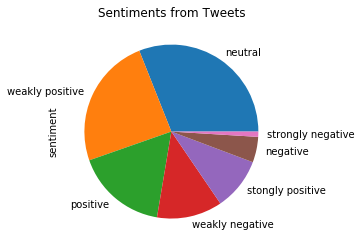

In [362]:
#creates pie chart
fig,ax = plt.subplots()
fig.set_size_inches(10,4)
ax = pd.value_counts(df['sentiment']).plot.pie()
ax.set(title="Sentiments from Tweets");

<h2>Summary:</h2>


The analysis that we perfromed today can be improved on by further cleaning the text data. In order to make data more accurate you will need to repeatedly clean your data and perfom the anlaysis again until you get the desired results. 